# Notebook 3b: Modeling with Random Forest

In this notebook, I will be exploring the random forest classifier and how it compares to the logistic regression model. Similar to the logistic regression notebook, I will be using a countvectorizer with the standard english stop words along with the most common 33 intersecting words between my target class, UnethicalLifeProTips, and my zero class, LifeProTips.  

I picked random forest classifier because it has plenty of hyperparameters that can be tuned, but few need to be tuned, and it naturally decreases the variance compared to bagged decision trees. It does this by selecting a random subset of the features at each split. In a standard bagged tree, the same features can be used over and over again in all of the trees, which means they will become correlated. By using random forest and picking a random subset at each split, we decrease the variance and the high correlation, which creates a stronger model. 

I am hoping that the random forest classifier will tune into the specific words used in each class and give us better insight into the specific words that can be associated with toxic and insincere online behavior. 

In [150]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import re
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

Pickling in my necessary pickles. 

In [173]:
with open('../assets/stopwords.pkl', 'rb') as f: #pickles adding columns back into 
    stopwords = pickle.load(f)
with open('../assets/X_train.pkl', 'rb') as f: #pickles adding columns back into 
    X_train = pickle.load(f)
with open('../assets/X_test.pkl', 'rb') as f: #pickles adding columns back into 
    X_test = pickle.load(f)
with open('../assets/y_train.pkl', 'rb') as f: #pickles adding columns back into 
    y_train = pickle.load(f)
with open('../assets/y_test.pkl', 'rb') as f: #pickles adding columns back into 
    y_test = pickle.load(f)
with open('../assets/X_kaggle.pkl', 'rb') as f: #pickles adding columns back into 
    X_kaggle = pickle.load(f)
with open('../assets/y_kaggle.pkl', 'rb') as f: #pickles adding columns back into 
    y_kaggle = pickle.load(f)

In [3]:
len(stopwords)

351

Reading in my cleaned dataframe for later use if necessary.

In [48]:
df = pd.read_csv('../data/df_clean.csv')

Taking a look at the cpu count on my computer so I can increase the n_jobs in my random forest classifier if necessary.

In [5]:
import multiprocessing

multiprocessing.cpu_count()

8

Instantiating my count vectorizer with the standard english stopwords, along with my additional 33 most common intersecting words between the two classes. 

In [6]:
cvec = CountVectorizer(stop_words=stopwords)

Fitting my vectorizer to the corpus

In [7]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'time', 'day', 'can', 'our', 'between', 'anyway', 'become', 'yet', 'one', 'under', 'fill', 'mill', 'with', 'there', 'now', 'full', 'across', 'your', 'be', 'mine', 'except', 'thence', 'else', 'to', 'being', 'indeed', 'get', 'side', 'want', 'youll', 'put', 'nor', 'detail', 'make'...twelve', 'like', 'should', 'fire', 'next', 'any', 'eleven', 'often', 'from', 'alone', 'us', 'done'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Transforming my vectorizer to my training set.

In [8]:
X_train_cvec = cvec.transform(X_train)

In [9]:
X_train_cvec.shape

(13182, 15966)

Doing the same on my testing data.

In [10]:
X_test_cvec = cvec.transform(X_test)

Creating dataframes of my cvec arrays for my training and testing datasets. Using the cvec featurenames as the columns. 

In [11]:
X_train_cvec = pd.DataFrame(X_train_cvec.toarray(), columns = cvec.get_feature_names())

In [12]:
X_test_cvec = pd.DataFrame(X_test_cvec.toarray(), columns = cvec.get_feature_names())

Instantiating and fitting my random forest classifier so that I can see how deep the tree goes.

In [29]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_cvec, y_train)
max([x.tree_.max_depth for x in rf.estimators_])

/Users/adamburpee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1134

In [14]:
X_train_cvec.shape

(13182, 15966)

Instantiating my random forest classifier once again. I am setting a random state of 42, n_jobs to 4, number of estimators to 100 (this is the number of trees i want in my forest), and a min samples split of 3, which means the minimum number of samples to split at a node. I toyed around with max depth and max features, but I decided to go with the defaults. The max depth default will go until all of the nodes are expanded. The max features will cap itself at the square root of the number of features I have. That will be about 126 features. 

In [13]:
rf = RandomForestClassifier(random_state= 42,
                            n_jobs = 4, 
                            n_estimators = 100,
#                             max_depth = 500,
#                             max_features = 12500, 
                            min_samples_split= 3)

Fitting my vectorized training set and my training y to the random forest

In [14]:
rf.fit(X_train_cvec, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Scoring my training set.

In [16]:
rf.score(X_train_cvec, y_train)

0.9971931421635564

This is an impressive score, but I am positive this will be overfit. On my training data, my random forest classifier is 99.7% accurate. We will take a look at the test score below.

In [17]:
rf.score(X_test_cvec, y_test)

0.795402822030041

My random forest model is significantly more overfit than my logreg model, which was expected. It increased accuracy by almost 2% compared to the logreg model. We will take a look at predictions and predictive probabilities below. 

In [18]:
preds_rf = rf.predict(X_test_cvec)

In [19]:
preds_rf

array([1, 0, 1, ..., 1, 0, 1])

In [40]:
rf.feature_importances_

array([2.13556935e-05, 1.05296998e-07, 4.42968074e-06, ...,
       3.37313564e-07, 3.63109832e-06, 2.17640584e-07])

In [108]:
from sklearn.metrics import confusion_matrix

I will be taking a look at the confusion matrix below

In [1]:
import datetime

In [7]:
def never_forgetti():
    from datetime import datetime
    due_date = datetime(2019, 5, 17, 17) # provide UTC time
    time_left = due_date - datetime.now()
    hours_left = round(time_left.total_seconds()/3600,2)
    print(f'You have {hours_left} hours left until capsplosion')

never_forgetti()    

You have 5.51 hours left until capsplosion


In [176]:
cm_df = pd.DataFrame(cm, columns = ['pred_neg', 'pred_pos'], index = ['actual_neg', 'actual_pos'])

In [177]:
cm_df

,pred_neg,pred_pos
actual_neg,1779,401
actual_pos,499,1715


For toxic behavior, our worst case scenario would be false negatives. We wouldn't want to predict something to be wholesome, when in fact it is toxic or insincere. Those would be the users who 'sneak through the cracks', so to say. As a beginning model, though, I think 1/8 of posts being predicted as false negatives is ok. 

Looking at feature importance to create a plot of the top 20 features for random forest classifier.

In [26]:
feat_importance = pd.DataFrame(rf.feature_importances_, 
                               X_train_cvec.columns, 
                               columns=['importance'])

In [71]:
temp = feat_importance.sort_values('importance', ascending=False).head(20)

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009]), <a list of 10 Text xticklabel objects>)

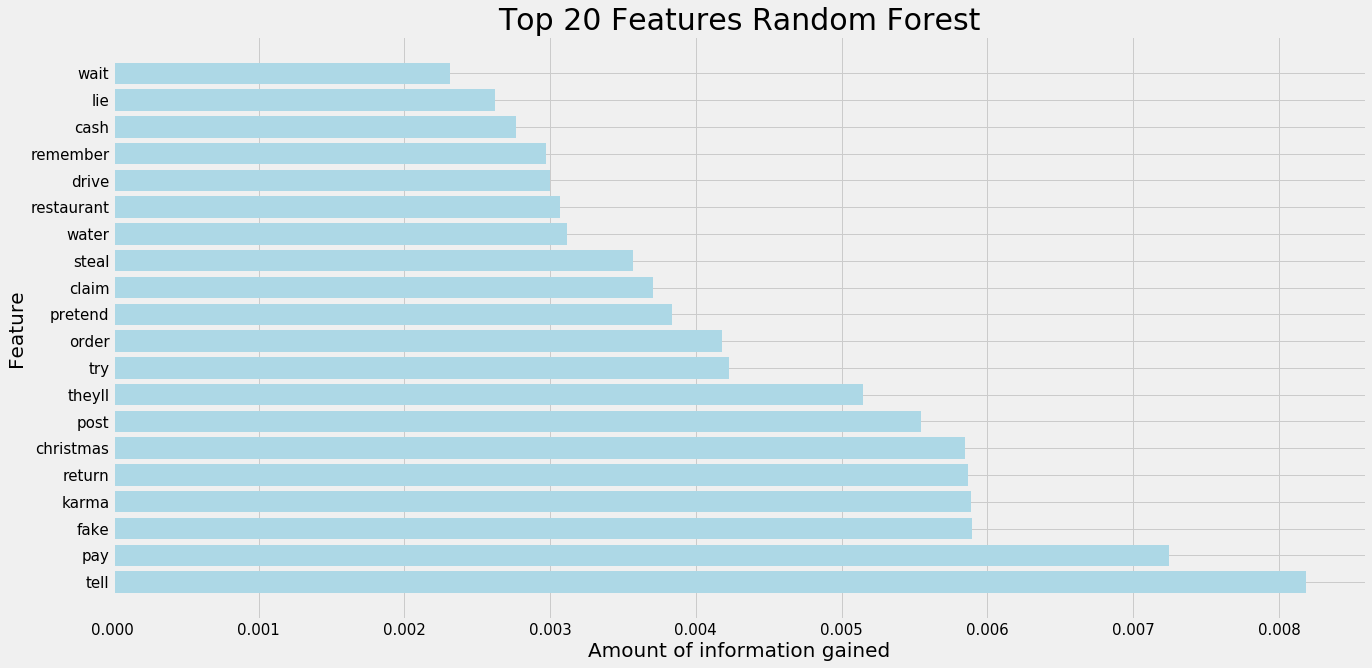

In [184]:
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=False).head(20)
plt.barh(temp.index, 
         temp['importance'],
         color = 'lightblue')
plt.title('Top 20 Features Random Forest', fontsize=30)
plt.xlabel('Amount of information gained', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

The top 20 features are pretty similar to the top 20 features from my logreg model. The amount of information gained isn't easy to interpret. It is based on decreasing the impurity at each split, meaning that when a node is going to be split, the tree picks the features that display the lowest gini impurity. The gini impurity is a measure of how often a randomly chosen feature would be labeled incorrectly if the label was also picked randomly. 

In laymens terms, these are the words that were picked and labeled correctly most often on average throughout the forest. 

Looking at the predicted probabilities of my countvectorized dataframe.

In [29]:
pred_probas = rf.predict_proba(X_test_cvec)

Getting the probabilities of my target class. 

In [30]:
ulpt_preds = pred_probas[:,1]

Looking at the target class the percentage out of total posts when it is above 80% sure that it is predicting the correct class. 

In [31]:
(ulpt_preds > .8).mean()

0.18320436959490213

Looking at the target class and when my model was less than 20% positive it was predicting the target class. This represents the percentage of posts that were above 80% in predicting the 0 class. 

In [32]:
(ulpt_preds < .2).mean()

0.22030040964952208

Above, we can see that 22% of my posts had less than 20% probability of being predicted to the target class. 

Below, we can see that about 8.5% of our posts sit around 50%, which is a good indicator that our model wasn't unsure about very many posts when it was classifying. We will take a look at some of these posts below. 

In [33]:
((.45 < ulpt_preds) & (ulpt_preds < .55)).mean()

0.08511606736458807

In [44]:
X_test.iloc[np.argwhere((.45 < ulpt_preds) & 
                        (ulpt_preds < .55))[:, 0]].head(10)

2917     if you have a cracked windshield call a haulin...
7443     dont take criticism from anyone you wouldnt ta...
4223     only dress up as charlie chaplin if you are wi...
3812     hink that your partner might be browsing your ...
3882     you should never have more than a few hundred ...
9603     want to ride a scooter around but dont want to...
15488    if you procrastinate studying for finals use y...
16803    cant legally carry brass knuckles in your area...
713      many supermarkets in the uk offer double money...
17068    get a fish ruler sticker for the wall next to ...
Name: title, dtype: object

Examining some of the posts from the middle 10% range.

In [65]:
X_test.loc[2917]

'if you have a cracked windshield call a haulingdisposal service and claim something fell off their truck some companies use gps tracking so try to find one on the freeway to make your story more credible before calling'

In [66]:
X_test.loc[7443]

'dont take criticism from anyone you wouldnt take advice from'

In [68]:
X_test.loc[15488]

'if you procrastinate studying for finals use your apple watch'

In [70]:
X_test.loc[3882]

'you should never have more than a few hundred dollars in your checking account'

Looking above, a human might be able to tell which of these posts display insincere or unethical ideas. Without the some of the keywords that we will explore below, a machine has a difficult time reading into them. In the first one, the post uses the word 'claim' which is a gives a lot of information to the target class, but it also uses the word 'credible' which might be more indicative of an wholesome post. This would be a case where increasing the n_grams might be helpful. 

Looking at the top 20 words that give the most information to my model. 

In [73]:
temp

,importance
tell,0.008186
pay,0.007246
fake,0.005891
karma,0.005886
return,0.005870
christmas,0.005849
post,0.005545
theyll,0.005143
try,0.004230
order,0.004181


In [139]:
list(temp.index)

['tell',
 'pay',
 'fake',
 'karma',
 'return',
 'christmas',
 'post',
 'theyll',
 'try',
 'order',
 'pretend',
 'claim',
 'steal',
 'water',
 'restaurant',
 'drive',
 'remember',
 'cash',
 'lie',
 'wait']

In [140]:
df[df['title'].str.contains('christmas')]['subreddit'].mean()

0.9726027397260274

In [141]:
df[df['title'].str.contains('tell')]['subreddit'].mean()

0.7457627118644068

Exploring the percent of posts in my target class that each of my top features was included in.

In [142]:
percent_list = []
for i in list(temp.index):
    print(round(df[df["title"].str.contains(i)]["subreddit"].mean(),2)*100, 
          f'percent of the posts with the word "{i}" point towards the target class') 
    percent_list.append(round(df[df["title"].str.contains(i)]["subreddit"].mean(),2)*100)

75.0 percent of the posts with the word "tell" point towards the target class
75.0 percent of the posts with the word "pay" point towards the target class
90.0 percent of the posts with the word "fake" point towards the target class
94.0 percent of the posts with the word "karma" point towards the target class
85.0 percent of the posts with the word "return" point towards the target class
97.0 percent of the posts with the word "christmas" point towards the target class
73.0 percent of the posts with the word "post" point towards the target class
82.0 percent of the posts with the word "theyll" point towards the target class
33.0 percent of the posts with the word "try" point towards the target class
77.0 percent of the posts with the word "order" point towards the target class
88.0 percent of the posts with the word "pretend" point towards the target class
89.0 percent of the posts with the word "claim" point towards the target class
92.0 percent of the posts with the word "steal" poi

In [179]:
temp['percent'] = percent_list

In [180]:
temp.sort_values('percent', ascending = False)

,importance,percent
christmas,0.005849,97.0
karma,0.005886,94.0
steal,0.003569,92.0
fake,0.005891,90.0
claim,0.003709,89.0
pretend,0.003839,88.0
return,0.005870,85.0
theyll,0.005143,82.0
cash,0.002764,79.0
restaurant,0.003066,78.0


Plotting the top 20 words and how often the target class was predicted when these words were in the post. 

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

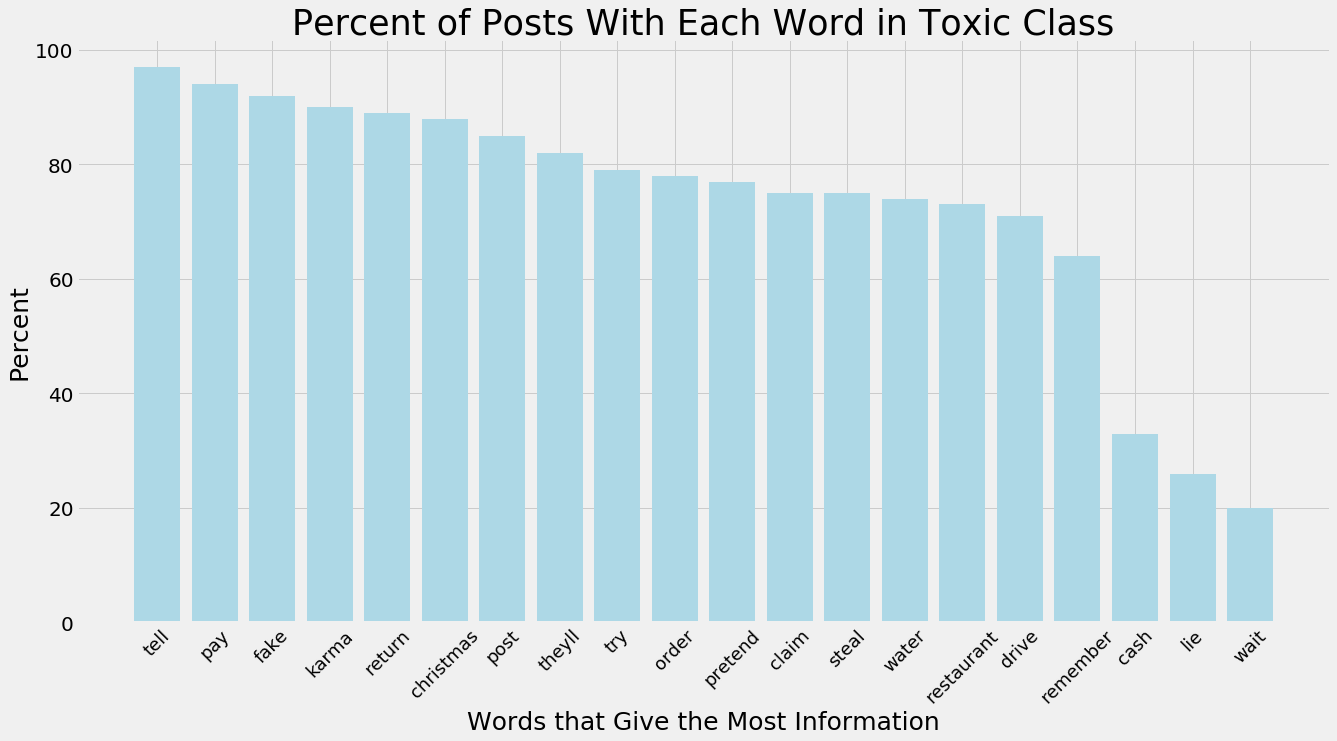

In [181]:
plt.figure(figsize = (20,10))
plt.bar(x=temp.index, 
        height = temp['percent'].sort_values(ascending = False),
        color = 'lightblue')
plt.xlabel(xlabel = 'Words that Give the Most Information', fontsize = 25)
plt.ylabel(ylabel = 'Percent', fontsize = 25)
plt.title('Percent of Posts With Each Word in Toxic Class', fontsize = 35)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 20)

The above graph shows the use of certain words and how often they are used in toxic posts. For example 94% of the posts with 'tell' in them were insincere or toxic posts. Right behind that is 'pay', 'fake', 'christmas', 'theyll', 'pretend', 'claim', 'steal'. While not looking too deeply into this, I am interested into the fact tha there are nicer, more wholesome ways to say some of these words. Knowing the context is great, but knowing that toxic posts encourage to 'tell' someone something, instead of 'to say' something to someone. Talking about people as 'they' instead of using the actual noun representing who they are. 'Christmas' is the most interesting to me. I found the most of the posts that have 'christmas' in them are trolling posts telling people how to display toxic behavior during the holidays. All in all, I think looking at the words used can be pretty accurate when filtering out toxic posts, but creating a model that looks into sentiment could also be useful in the future. 

Wondering how many posts these 20 words have been in all together. 

In [106]:
count = 0
for i in list(temp.index): 
    count += df[df['title'].str.contains(i)]['title'].count()

In [107]:
count

8057

These 20 words have been in almost 50 percent of the posts i scraped, and all but 3 of them are strong predictors for the target class, Unethical Life Pro Tips. 

Setting up a pd to run a AUC ROC graph.

In [111]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':ulpt_preds})

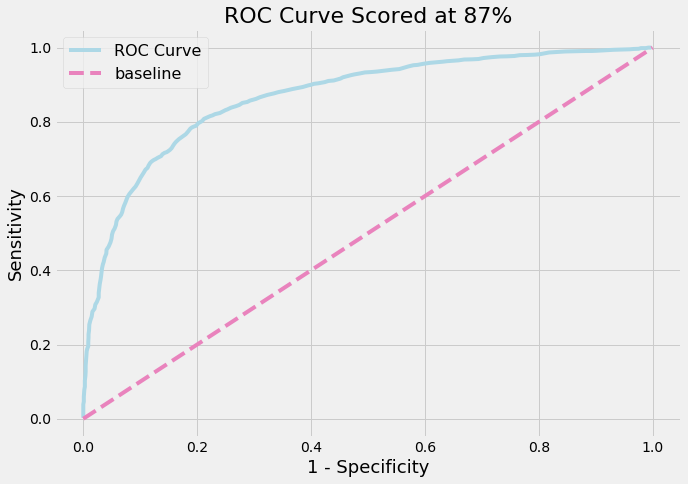

In [172]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plotting the ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve',
         color = 'lightblue')

# Plotting the baseline.
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--',
         color = '#E983BD')

# Axis Labels
plt.title('ROC Curve Scored at 87%', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# legend.
plt.legend(fontsize=16);

My auc roc curve shows a pretty good model at determining which class a given post is from, given the words used in the post. Essentially, the curve representing my target class(ULPT) overlaps with the curve representing my 0 class (LPT). This means that there isn't complete separation between the two, so there is some overlap in the classification of the two. Some posts are classified false positively, and some are classified false negatively. My score of 87% means that there is an 87% chance that my model will be able to predict which class a given post comes from. That means that 87% of the time, my model can determine whether or not a given post is toxic or insincere. 

In [168]:
from sklearn.metrics import roc_auc_score

In [170]:
auc_roc_score = round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),2)

In [171]:
auc_roc_score

0.87

Pulling in kaggle data and scoring it with my random forest model. 

In [182]:
X_kaggle_cvec = cvec.transform(X_kaggle)

In [183]:
rf.score(X_kaggle_cvec, y_kaggle)

0.5592

To my surprise, my random forest classifier performed worse on the kaggle data than my logreg model. My log reg model predicted toxicity in a completely unknown dataset with 60% accuracy, while my Random Forest model predicted it with 55% accuracy. 

# Conclusions and Next Steps

After looking at my random forest model and my logistic regression model, I think I would pick my logistic regression model to use in production. The top 20 features in each are pretty similar to each other, but my logistic regression model is more accurate on unknown data, which is the same type of data that will be gathered 'in the field', so to say. I think that my logistic regression model can be used to identify toxic or insincere behavior online. Random Forest worked really well on the data I trained it on, with an accuracy score of 99%, but on the testing data it was marginally better than the logistic regression model and on the unknown data it was 5% worse, just barely eking out the baseline accuracy. 

Next steps would be to look into sentiment analysis to try to find the overall latent semantic analysis to create relationships between the different posts, and hopefully look into how those relationships, along with word usage, can predict toxic behavior online. 

Toxic and insincere trolling behavior will always be a part of internet culture, and arguable, that is part of the fun of being online. It is the wild wild west of real life. You can say anything you want, be anyone you want, and tell anyone whatever you want. However, there are certain settings and forums in which this behavior isn't accepted or tolerated. I think that these models are a good step in the direction of implementing bot moderators that aren't humans who have to read every single post and can follow a certain set of guidelines based on the rules of a specific forum. 